# CIENCIA DE DATOS

## Módulo 8 - Algoritmos de Boosting

Revisar capitulo 

ESL - 10,15,16

ISL - 8 

Leer articulos

https://medium.com/analytics-vidhya/random-forest-classifier-and-its-hyperparameters-8467bec755f6

En esta clase vamos a ver dos algoritmos de Boosting, recordemos que el punto de Boosting es ir aprendiendo sobre los errores

AdaBoost ( Adaptive Boosting)
Adaboost combina múltiples estimadores débiles en un solo estimador fuerte. Los estimadores débiles en AdaBoost son árboles de decisión con una sola división. Cuando AdaBoost crea su primer split de decisión, todas las observaciones se ponderan por igual. Para corregir el error anterior, las observaciones que se clasificaron incorrectamente ahora tienen más peso que las observaciones que se clasificaron correctamente. Los algoritmos de AdaBoost se pueden utilizar tanto para problemas de clasificación como de regresión.

![fig](https://miro.medium.com/max/1088/1*m2UHkzWWJ0kfQyL5tBFNsQ.png)

El algoritmo se ve 
![fig](https://i.stack.imgur.com/mQ9Np.png)

# AdaBoosting Algorithm from scratch

In [ ]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import sample
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import tree
from math import log,exp

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [ ]:
#importing file
iris = pd.read_csv("files/iris.csv")  

In [ ]:
iris = iris.drop('Unnamed: 0', axis=1)

In [ ]:
iris.head(1)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa


In [ ]:
#considering only two classes
example = iris[(iris['Species'] == 'versicolor') | (iris['Species'] == 'virginica')]

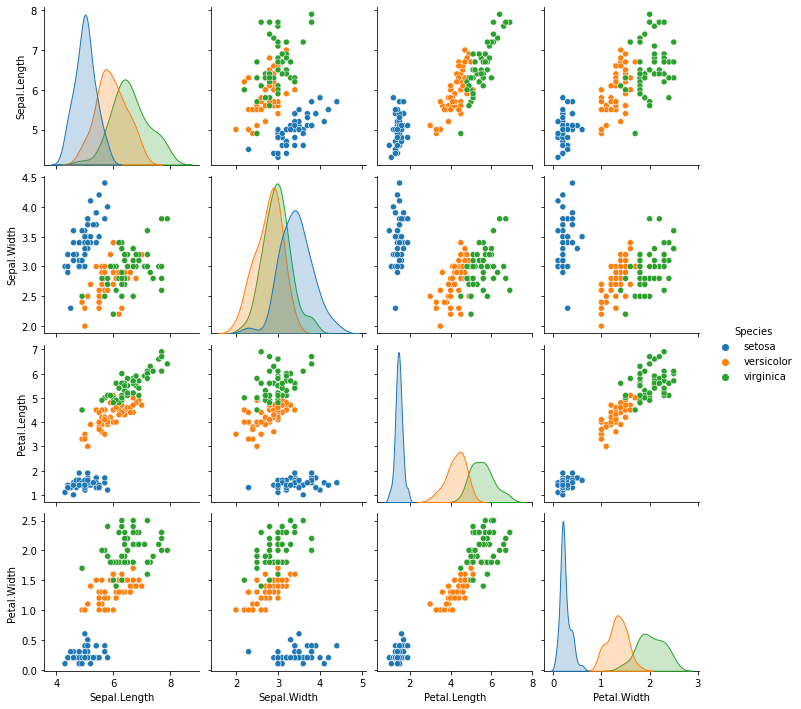

In [ ]:
import seaborn as sns
sns.pairplot(iris[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']], hue = "Species")

In [ ]:
example.head(2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor


In [ ]:
#replacing the two classes with +1 and -1
example['Label'] = example['Species'].replace(to_replace = ['versicolor','virginica'], value=[1,-1])

/var/folders/mq/q8s4gj3j6930bhf495rt0l1m0000gp/T/ipykernel_88969/3357937336.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  example['Label'] = example['Species'].replace(to_replace = ['versicolor','virginica'], value=[1,-1])


In [ ]:
example = example.drop('Species', axis = 1)

In [ ]:
len(example)

100

In [ ]:
#Initially assign same weights to each records in the dataset
example['probR1'] = 1/(example.shape[0])

In [ ]:
example.head(5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Label,probR1
50,7.0,3.2,4.7,1.4,1,0.01
51,6.4,3.2,4.5,1.5,1,0.01
52,6.9,3.1,4.9,1.5,1,0.01
53,5.5,2.3,4.0,1.3,1,0.01
54,6.5,2.8,4.6,1.5,1,0.01


In [ ]:
#simple random sample with replacement
random.seed(10)
example1 = example.sample(len(example), replace = True, weights = example['probR1'])

In [ ]:
example1

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Label,probR1
99,5.7,2.8,4.1,1.3,1,0.01
63,6.1,2.9,4.7,1.4,1,0.01
92,5.8,2.6,4.0,1.2,1,0.01
117,7.7,3.8,6.7,2.2,-1,0.01
125,7.2,3.2,6.0,1.8,-1,0.01
147,6.5,3.0,5.2,2.0,-1,0.01
71,6.1,2.8,4.0,1.3,1,0.01
52,6.9,3.1,4.9,1.5,1,0.01
89,5.5,2.5,4.0,1.3,1,0.01
115,6.4,3.2,5.3,2.3,-1,0.01


In [ ]:
#X_train and Y_train split
X_train = example1.iloc[0:len(iris),0:4]
y_train = example1.iloc[0:len(iris),4]

In [ ]:
#fitting the DT model with depth one
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

[Text(0.5, 0.75, 'X[2] <= 4.75\ngini = 0.498\nsamples = 100\nvalue = [53, 47]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 45\nvalue = [0, 45]'),
 Text(0.75, 0.25, 'gini = 0.07\nsamples = 55\nvalue = [53, 2]')]

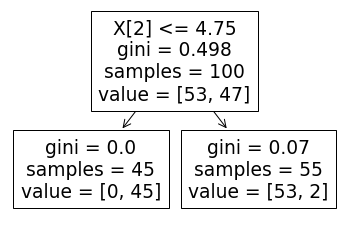

In [ ]:
#plotting tree for round 1 boosting
tree.plot_tree(clf)

In [ ]:
#prediction
y_pred = clf_gini.predict(example.iloc[0:len(iris),0:4])
y_pred

array([ 1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [ ]:
#adding a column pred1 after the first round of boosting
example['pred1'] = y_pred

In [ ]:
example

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Label,probR1,pred1
50,7.0,3.2,4.7,1.4,1,0.01,1
51,6.4,3.2,4.5,1.5,1,0.01,1
52,6.9,3.1,4.9,1.5,1,0.01,-1
53,5.5,2.3,4.0,1.3,1,0.01,1
54,6.5,2.8,4.6,1.5,1,0.01,1
55,5.7,2.8,4.5,1.3,1,0.01,1
56,6.3,3.3,4.7,1.6,1,0.01,1
57,4.9,2.4,3.3,1.0,1,0.01,1
58,6.6,2.9,4.6,1.3,1,0.01,1
59,5.2,2.7,3.9,1.4,1,0.01,1


In [ ]:
#misclassified = 0 if the label and prediction are same
example.loc[example.Label != example.pred1, 'misclassified'] = 1
example.loc[example.Label == example.pred1, 'misclassified'] = 0

In [ ]:
#error calculation
e1 = sum(example['misclassified'] * example['probR1'])

In [ ]:
e1

0.07

In [ ]:
#calculation of alpha (performance)
alpha1 = 0.5*log((1-e1)/e1)

In [ ]:
alpha1

1.2933446720489712

In [ ]:
#update weight
new_weight = example['probR1']*np.exp(-1*alpha1*example['Label']*example['pred1'])

In [ ]:
#normalized weight
z = sum(new_weight)
normalized_weight = new_weight/sum(new_weight)

In [ ]:
example['prob2'] = round(normalized_weight,4)

In [ ]:
example

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Label,probR1,pred1,misclassified,prob2
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0054
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0054
52,6.9,3.1,4.9,1.5,1,0.01,-1,1.0,0.0714
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0054
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0054
55,5.7,2.8,4.5,1.3,1,0.01,1,0.0,0.0054
56,6.3,3.3,4.7,1.6,1,0.01,1,0.0,0.0054
57,4.9,2.4,3.3,1.0,1,0.01,1,0.0,0.0054
58,6.6,2.9,4.6,1.3,1,0.01,1,0.0,0.0054
59,5.2,2.7,3.9,1.4,1,0.01,1,0.0,0.0054


In [ ]:
#round 2
random.seed(20)
example2 = example.sample(len(example), replace = True, weights = example['prob2'])
example2 = example2.iloc[:,0:5]
X_train = example2.iloc[0:len(iris),0:4]
y_train = example2.iloc[0:len(iris),4]

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

y_pred = clf_gini.predict(example.iloc[0:len(iris),0:4])
#adding a column pred2 after the second round of boosting
example['pred2'] = y_pred

[Text(0.5, 0.75, 'X[2] <= 5.05\ngini = 0.442\nsamples = 100\nvalue = [33, 67]'),
 Text(0.25, 0.25, 'gini = 0.195\nsamples = 73\nvalue = [8, 65]'),
 Text(0.75, 0.25, 'gini = 0.137\nsamples = 27\nvalue = [25, 2]')]

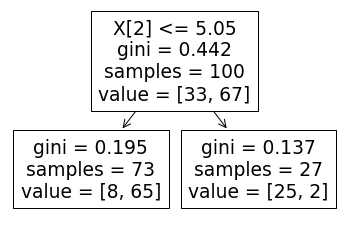

In [ ]:
#plotting tree for round 2 boosting
tree.plot_tree(clf)

In [ ]:
example

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Label,probR1,pred1,misclassified,prob2,pred2
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0054,1
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0054,1
52,6.9,3.1,4.9,1.5,1,0.01,-1,1.0,0.0714,1
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0054,1
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0054,1
55,5.7,2.8,4.5,1.3,1,0.01,1,0.0,0.0054,1
56,6.3,3.3,4.7,1.6,1,0.01,1,0.0,0.0054,1
57,4.9,2.4,3.3,1.0,1,0.01,1,0.0,0.0054,1
58,6.6,2.9,4.6,1.3,1,0.01,1,0.0,0.0054,1
59,5.2,2.7,3.9,1.4,1,0.01,1,0.0,0.0054,1


In [ ]:
#adding a field misclassified2
example.loc[example.Label != example.pred2, 'misclassified2'] = 1
example.loc[example.Label == example.pred2, 'misclassified2'] = 0

In [ ]:
# calculation of error
e2 = sum(example['misclassified2'] * example['prob2'])
e2

0.18599999999999992

In [ ]:
#calculation of alpha
alpha2 = 0.5*log((1-e2)/e2)
alpha2

0.7381068461446698

In [ ]:
#update weight
new_weight = example['prob2']*np.exp(-1*alpha2*example['Label']*example['pred2'])
z = sum(new_weight)
normalized_weight = new_weight/sum(new_weight)

In [ ]:
example['prob3'] = round(normalized_weight,4)

In [ ]:
example

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Label,probR1,pred1,misclassified,prob2,pred2,misclassified2,prob3
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0054,1,0.0,0.0033
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0054,1,0.0,0.0033
52,6.9,3.1,4.9,1.5,1,0.01,-1,1.0,0.0714,1,0.0,0.0438
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0054,1,0.0,0.0033
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0054,1,0.0,0.0033
55,5.7,2.8,4.5,1.3,1,0.01,1,0.0,0.0054,1,0.0,0.0033
56,6.3,3.3,4.7,1.6,1,0.01,1,0.0,0.0054,1,0.0,0.0033
57,4.9,2.4,3.3,1.0,1,0.01,1,0.0,0.0054,1,0.0,0.0033
58,6.6,2.9,4.6,1.3,1,0.01,1,0.0,0.0054,1,0.0,0.0033
59,5.2,2.7,3.9,1.4,1,0.01,1,0.0,0.0054,1,0.0,0.0033


In [ ]:
#round 3
random.seed(30)
example3 = example.sample(len(example), replace = True, weights = example['prob3'])
example3 = example3.iloc[:,0:5]
X_train = example3.iloc[0:len(iris),0:4]
y_train = example3.iloc[0:len(iris),4]

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

#adding a column pred3 after the third round of boosting
y_pred = clf_gini.predict(example.iloc[0:len(iris),0:4])
example['pred3'] = y_pred

[Text(0.5, 0.75, 'X[3] <= 1.65\ngini = 0.495\nsamples = 100\nvalue = [55, 45]'),
 Text(0.25, 0.25, 'gini = 0.169\nsamples = 43\nvalue = [4, 39]'),
 Text(0.75, 0.25, 'gini = 0.188\nsamples = 57\nvalue = [51, 6]')]

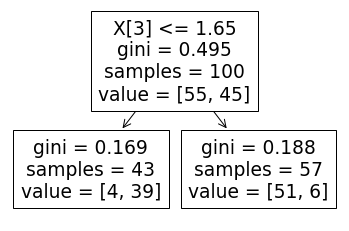

In [ ]:
#plotting tree for round 3 boosting
tree.plot_tree(clf)

In [ ]:
#adding a field misclassified3
example.loc[example.Label != example.pred3, 'misclassified3'] = 1
example.loc[example.Label == example.pred3, 'misclassified3'] = 0

In [ ]:
#weighted error calculation
e3 = sum(example['misclassified3'] * example['prob3']) #/len(example)
e3

0.11199999999999999

In [ ]:
#calculation of performance(alpha)
alpha3 = 0.5*log((1-e3)/e3)

In [ ]:
#update weight
new_weight = example['prob3']*np.exp(-1*alpha3*example['Label']*example['pred3'])
z = sum(new_weight)
normalized_weight = new_weight/sum(new_weight)

In [ ]:
example['prob4'] = round(normalized_weight,4)

In [ ]:
example

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Label,probR1,pred1,misclassified,prob2,pred2,misclassified2,prob3,pred3,misclassified3,prob4
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0054,1,0.0,0.0033,1,0.0,0.0019
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0054,1,0.0,0.0033,1,0.0,0.0019
52,6.9,3.1,4.9,1.5,1,0.01,-1,1.0,0.0714,1,0.0,0.0438,1,0.0,0.0247
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0054,1,0.0,0.0033,1,0.0,0.0019
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0054,1,0.0,0.0033,1,0.0,0.0019
55,5.7,2.8,4.5,1.3,1,0.01,1,0.0,0.0054,1,0.0,0.0033,1,0.0,0.0019
56,6.3,3.3,4.7,1.6,1,0.01,1,0.0,0.0054,1,0.0,0.0033,1,0.0,0.0019
57,4.9,2.4,3.3,1.0,1,0.01,1,0.0,0.0054,1,0.0,0.0033,1,0.0,0.0019
58,6.6,2.9,4.6,1.3,1,0.01,1,0.0,0.0054,1,0.0,0.0033,1,0.0,0.0019
59,5.2,2.7,3.9,1.4,1,0.01,1,0.0,0.0054,1,0.0,0.0033,1,0.0,0.0019


In [ ]:
#Round 4
random.seed(40)
example4 = example.sample(len(example), replace = True, weights = example['prob4'])
example4 = example4.iloc[:,0:5]
X_train = example4.iloc[0:len(iris),0:4]
y_train = example4.iloc[0:len(iris),4]

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

#adding a column pred4 after the fourth round of boosting
y_pred = clf_gini.predict(example.iloc[0:len(iris),0:4])
example['pred4'] = y_pred

[Text(0.5, 0.75, 'X[1] <= 2.55\ngini = 0.466\nsamples = 100\nvalue = [37, 63]'),
 Text(0.25, 0.25, 'gini = 0.227\nsamples = 23\nvalue = [20, 3]'),
 Text(0.75, 0.25, 'gini = 0.344\nsamples = 77\nvalue = [17, 60]')]

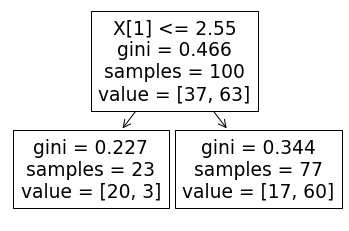

In [ ]:
#plotting tree for round 4 boosting
tree.plot_tree(clf)

In [ ]:
#adding a field misclassified4
example.loc[example.Label != example.pred4, 'misclassified4'] = 1
example.loc[example.Label == example.pred4, 'misclassified4'] = 0

In [ ]:
#error calculation
e4 = sum(example['misclassified4'] * example['prob4']) 
e4

0.20290000000000016

In [ ]:
# calculation of performance (alpha)
alpha4 = 0.5*log((1-e4)/e4)

In [ ]:
#printing the alpha value which is used in each round of boosting
print(alpha1)
print(alpha2)
print(alpha3)
print(alpha4)

1.2933446720489712
0.7381068461446698
1.0352364358485378
0.6841334473010537


In [ ]:
#final prediction
t = alpha1 * example['pred1'] + alpha2 * example['pred2'] + alpha3 * example['pred3'] + alpha4 * example['pred4']

In [ ]:
#sign of the final prediction
np.sign(list(t))

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1.,
        1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,
       -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [ ]:
example['final_pred'] = np.sign(list(t))

In [ ]:
example

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Label,probR1,pred1,misclassified,prob2,pred2,misclassified2,prob3,pred3,misclassified3,prob4,pred4,misclassified4,final_pred
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0054,1,0.0,0.0033,1,0.0,0.0019,1,0.0,1.0
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0054,1,0.0,0.0033,1,0.0,0.0019,1,0.0,1.0
52,6.9,3.1,4.9,1.5,1,0.01,-1,1.0,0.0714,1,0.0,0.0438,1,0.0,0.0247,1,0.0,1.0
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0054,1,0.0,0.0033,1,0.0,0.0019,-1,1.0,1.0
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0054,1,0.0,0.0033,1,0.0,0.0019,1,0.0,1.0
55,5.7,2.8,4.5,1.3,1,0.01,1,0.0,0.0054,1,0.0,0.0033,1,0.0,0.0019,1,0.0,1.0
56,6.3,3.3,4.7,1.6,1,0.01,1,0.0,0.0054,1,0.0,0.0033,1,0.0,0.0019,1,0.0,1.0
57,4.9,2.4,3.3,1.0,1,0.01,1,0.0,0.0054,1,0.0,0.0033,1,0.0,0.0019,-1,1.0,1.0
58,6.6,2.9,4.6,1.3,1,0.01,1,0.0,0.0054,1,0.0,0.0033,1,0.0,0.0019,1,0.0,1.0
59,5.2,2.7,3.9,1.4,1,0.01,1,0.0,0.0054,1,0.0,0.0033,1,0.0,0.0019,1,0.0,1.0


In [ ]:
#Confusion matrix
c=confusion_matrix(example['Label'], example['final_pred'])
c

array([[49,  1],
       [ 4, 46]])

In [ ]:
#Overall Accuracy
(c[0,0]+c[1,1])/np.sum(c)*100

95.0

In [ ]:
#Fitting the model using the adaboost classifier library

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
iris = pd.read_csv("files/iris.csv")  
iris = iris.drop('Unnamed: 0', axis=1)
iris = iris[(iris['Species'] == 'versicolor') | (iris['Species'] == 'virginica')]

In [ ]:
#X_train and Y_train split
X_train = iris.iloc[0:len(iris),0:4]
y_train = iris.iloc[0:len(iris),4]

In [ ]:
clf = AdaBoostClassifier(n_estimators=4, random_state=0)
clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=4, random_state=0)

In [ ]:
clf.predict([[5.5, 2.5, 4.0, 1.3]])

/Users/carlosograndetcaballero/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


array(['versicolor'], dtype=object)

In [ ]:
clf.score(X_train, y_train)

0.96

### Veamos un ejemplo con datos dummy

In [ ]:
from typing import Optional
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

def plot_adaboost(X: np.ndarray,
                  y: np.ndarray,
                  clf=None,
                  sample_weights: Optional[np.ndarray] = None,
                  annotate: bool = False,
                  ax: Optional[mpl.axes.Axes] = None) -> None:
    """ Plot ± samples in 2D, optionally with decision boundary """

    assert set(y) == {-1, 1}, 'Expecting response labels to be ±1'

    if not ax:
        fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
        fig.set_facecolor('white')

    pad = 1
    x_min, x_max = X[:, 0].min() - pad, X[:, 0].max() + pad
    y_min, y_max = X[:, 1].min() - pad, X[:, 1].max() + pad

    if sample_weights is not None:
        sizes = np.array(sample_weights) * X.shape[0] * 100
    else:
        sizes = np.ones(shape=X.shape[0]) * 100

    X_pos = X[y == 1]
    sizes_pos = sizes[y == 1]
    ax.scatter(*X_pos.T, s=sizes_pos, marker='+', color='red')

    X_neg = X[y == -1]
    sizes_neg = sizes[y == -1]
    ax.scatter(*X_neg.T, s=sizes_neg, marker='.', c='blue')

    if clf:
        plot_step = 0.01
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        # If all predictions are positive class, adjust color map acordingly
        if list(np.unique(Z)) == [1]:
            fill_colors = ['r']
        else:
            fill_colors = ['b', 'r']

        ax.contourf(xx, yy, Z, colors=fill_colors, alpha=0.2)

    if annotate:
        for i, (x, y) in enumerate(X):
            offset = 0.05
            ax.annotate(f'$x_{i + 1}$', (x + offset, y - offset))

    ax.set_xlim(x_min+0.5, x_max-0.5)
    ax.set_ylim(y_min+0.5, y_max-0.5)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')

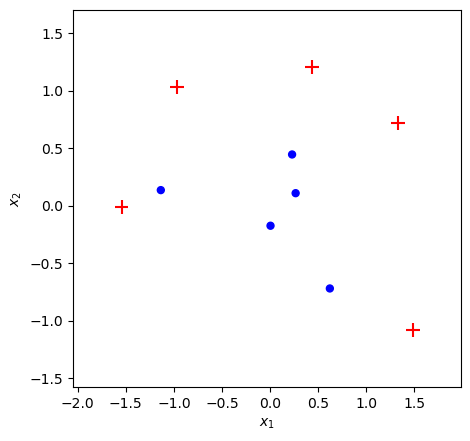

In [ ]:
from sklearn.datasets import make_gaussian_quantiles
from sklearn.model_selection import train_test_split

def make_toy_dataset(n: int = 100, random_seed: int = None):
    """ Generate a toy dataset for evaluating AdaBoost classifiers """
    
    n_per_class = int(n/2)
    
    if random_seed:
        np.random.seed(random_seed)

    X, y = make_gaussian_quantiles(n_samples=n, n_features=2, n_classes=2)
    
    return X, y*2-1

X, y = make_toy_dataset(n=10, random_seed=10)
plot_adaboost(X, y)

Train error: 0.0%


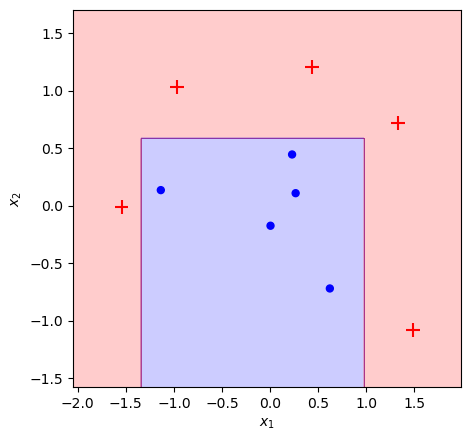

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

bench = AdaBoostClassifier(n_estimators=10, algorithm='SAMME').fit(X, y)
plot_adaboost(X, y, bench)

train_err = (bench.predict(X) != y).mean()
print(f'Train error: {train_err:.1%}')

El algoritmo se ve 
![fig](https://i.stack.imgur.com/mQ9Np.png)

Variable	Math
1. sample_weights with shape: (T, n) - w
2. stumps with shape: (T, )	 - Gm
3. stump_weights with shape (T, )	- $\alpha$
4. errors with shape: (T, )	 - err


In [ ]:
class AdaBoost:
    """ AdaBoost enemble classifier from scratch """

    def __init__(self):
        self.stumps = None
        self.stump_weights = None
        self.errors = None
        self.sample_weights = None

    def _check_X_y(self, X, y):
        """ Validate assumptions about format of input data"""
        assert set(y) == {-1, 1}, 'Response variable must be ±1'
        return X, y

In [ ]:
from sklearn.tree import DecisionTreeClassifier

def fit(self, X: np.ndarray, y: np.ndarray, iters: int):
    """ Fit the model using training data """

    X, y = self._check_X_y(X, y)
    n = X.shape[0]

    # init numpy arrays
    self.sample_weights = np.zeros(shape=(iters, n))
    self.stumps = np.zeros(shape=iters, dtype=object)
    self.stump_weights = np.zeros(shape=iters)
    self.errors = np.zeros(shape=iters)

    # initialize weights uniformly
    self.sample_weights[0] = np.ones(shape=n) / n

    for t in range(iters):
        # fit  weak learner
        curr_sample_weights = self.sample_weights[t]
        stump = DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2)
        stump = stump.fit(X, y, sample_weight=curr_sample_weights)

        # calculate error and stump weight from weak learner prediction
        stump_pred = stump.predict(X)
        err = curr_sample_weights[(stump_pred != y)].sum()# / n
        stump_weight = np.log((1 - err) / err) / 2

        # update sample weights
        new_sample_weights = (
            curr_sample_weights * np.exp(-stump_weight * y * stump_pred)
        )
        
        new_sample_weights /= new_sample_weights.sum()

        # If not final iteration, update sample weights for t+1
        if t+1 < iters:
            self.sample_weights[t+1] = new_sample_weights

        # save results of iteration
        self.stumps[t] = stump
        self.stump_weights[t] = stump_weight
        self.errors[t] = err

    return self

In [ ]:
def predict(self, X):
    """ Make predictions using already fitted model """
    stump_preds = np.array([stump.predict(X) for stump in self.stumps])
    return np.sign(np.dot(self.stump_weights, stump_preds))

Train error: 0.0%


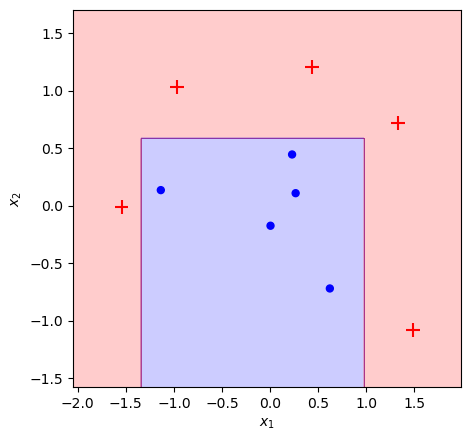

In [ ]:
# assign our individually defined functions as methods of our classifier
AdaBoost.fit = fit
AdaBoost.predict = predict

clf = AdaBoost().fit(X, y, iters=10)
plot_adaboost(X, y, clf)

train_err = (clf.predict(X) != y).mean()
print(f'Train error: {train_err:.1%}')

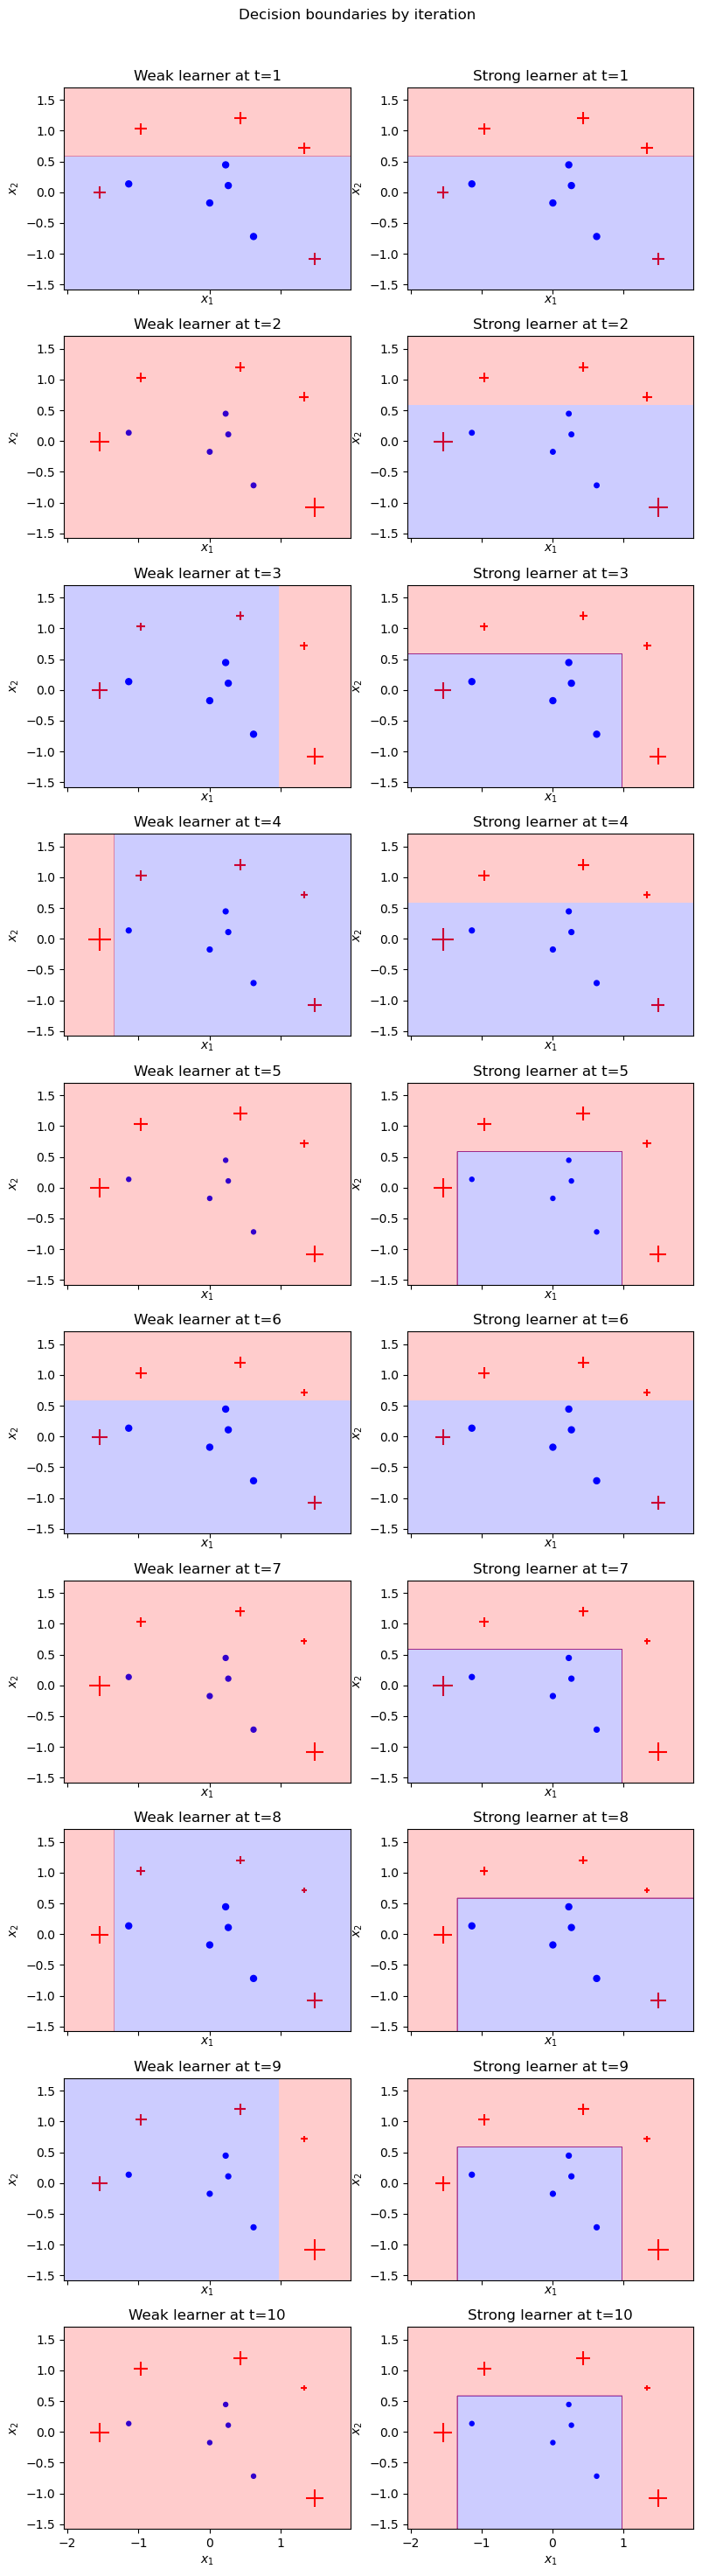

In [ ]:
def truncate_adaboost(clf, t: int):
    """ Truncate a fitted AdaBoost up to (and including) a particular iteration """
    assert t > 0, 't must be a positive integer'
    from copy import deepcopy
    new_clf = deepcopy(clf)
    new_clf.stumps = clf.stumps[:t]
    new_clf.stump_weights = clf.stump_weights[:t]
    return new_clf


def plot_staged_adaboost(X, y, clf, iters=10):
    """ Plot weak learner and cumulaive strong learner at each iteration. """

    # larger grid
    fig, axes = plt.subplots(figsize=(8, iters*3),
                             nrows=iters,
                             ncols=2,
                             sharex=True,
                             dpi=100)
    
    fig.set_facecolor('white')

    _ = fig.suptitle('Decision boundaries by iteration')
    for i in range(iters):
        ax1, ax2 = axes[i]

        # Plot weak learner
        _ = ax1.set_title(f'Weak learner at t={i + 1}')
        plot_adaboost(X, y, clf.stumps[i],
                      sample_weights=clf.sample_weights[i],
                      annotate=False, ax=ax1)

        # Plot strong learner
        trunc_clf = truncate_adaboost(clf, t=i + 1)
        _ = ax2.set_title(f'Strong learner at t={i + 1}')
        plot_adaboost(X, y, trunc_clf,
                      sample_weights=clf.sample_weights[i],
                      annotate=False, ax=ax2)

    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

clf = AdaBoost().fit(X, y, iters=10)
plot_staged_adaboost(X, y, clf)

# Gradient Boosting

Al igual que AdaBoost, Gradient Boosting funciona agregando secuencialmente predictores a un conjunto, cada uno corrigiendo a su predecesor.Sin embargo, en lugar de cambiar los pesos para cada observación clasificada incorrecta en cada iteración como AdaBoost, el método Gradient Boosting intenta ajustar el nuevo predictor a los errores residuales cometidos por el predictor anterior.

![fig](https://miro.medium.com/max/1400/1*FQulhlORGZcoUByMORaLAA.png)

Construir uno desde cero

![](nb_images/gbm_bay.jpg "SF from Angel Island")

In [ ]:
#hide
import numpy as np 
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot as plt 
plt.style.use('default')

%matplotlib inline

## Toy Data

Usemos datos dummy

In [ ]:
#hide
import numpy as np 

rng = np.random.default_rng()
x = np.linspace(0, 10, 50)
y = np.where(x < 5, x, 5) + rng.normal(0, 0.4, size=x.shape)
x = x.reshape(-1,1)

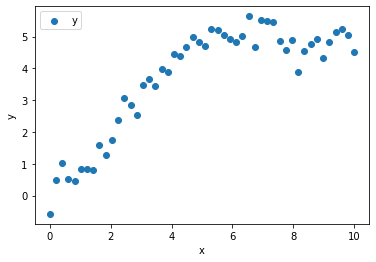

In [ ]:
#hide_input
plt.scatter(x,y, label='y')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

## Intuition

Pongamos un modelo sencillo $F_0(x)$ que use variables $x$ para predecir $y$.
Un modelo sencillo $F_0(x)$ seria uno que prediga el promedio de $y$.

$$F_0(x) = \bar{y}$$


In [ ]:
#hide
eta = 1

F_0 = y.mean() * np.ones(shape=y.shape)

h_1 = DecisionTreeRegressor(max_depth=1)
h_1.fit(x, y - F_0)
F_1 = F_0 + eta * h_1.predict(x)

h_2 = DecisionTreeRegressor(max_depth=1)
h_2.fit(x, y - F_1)
F_2 = F_1 + eta * h_2.predict(x)

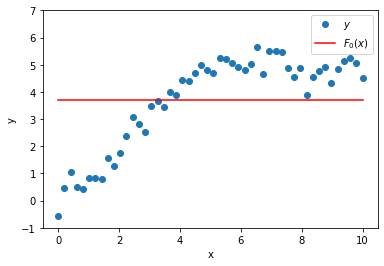

In [ ]:
#hide_input
plt.plot(x, y, 'o', label=r'$y$')
plt.plot(x, F_0, '-r', label=r'$F_0(x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.ylim([-1,7]);

$F_0(x)$ el modelo no es muy bueno por lo que los residuales $y - F_0(x)$ siguen siendo muy grandes y pueden seguir capturando información 

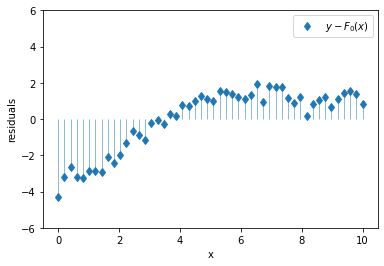

In [ ]:
#hide_input
fig, ax = plt.subplots()
ax.plot(x, y - F_0, 'd', label=r'$y - F_0(x)$')
ax.vlines(x, 0, y - F_0, linewidth=0.5)
# plt.plot(x, h_1.predict(x), '--r', label=r'$h_1(x)$')
plt.xlabel('x')
plt.ylabel('residuals')
ax.legend()
ax.set_ylim([-6, 6]);

Ahora hacemos un modelo simple $h_1(x)$ que prediga los residuales $y - F_0(x)$?

$$
\begin{array}{rcl}
\text{Model: }& & h_1(x) \\
\text{Features:}& & x \\
\text{Target:}& & y - F_0(x)
\end{array}
$$

Usemos un modelo muy simple, un árbol de decisión con un sólo split

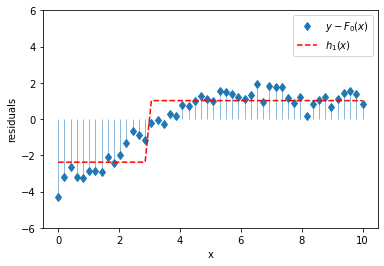

In [ ]:
#hide_input
fig, ax = plt.subplots()
ax.plot(x, y - F_0, 'd', label=r'$y - F_0(x)$')
ax.vlines(x, 0, y - F_0, linewidth=0.5)
plt.plot(x, h_1.predict(x), '--r', label=r'$h_1(x)$')
plt.xlabel('x')
plt.ylabel('residuals')
ax.legend()
ax.set_ylim([-6, 6]);

Ahora podemos hacer un modelo compuesto que agregue las predicciones del modelo base  $F_0(x)$ a lass predicciones del modelo complementario $h_1(x)$ (esto capturará algo del error de $F_0(x)$). Obtenemos un nuevo modelo $F_1(x)$:

$$F_1(x) = F_0(x) + h_1(x)$$

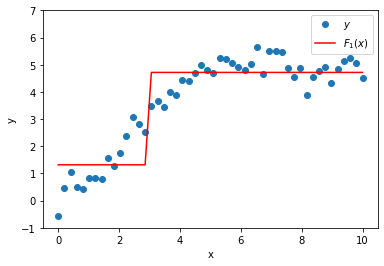

In [ ]:
#hide_input
plt.plot(x, y, 'o', label=r'$y$')
plt.plot(x, F_1, '-r', label=r'$F_1(x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.ylim([-1,7]);

Por qué parar aquí? Nuestro nuevo modelo $F_1(x)$ sigue siendo imperfecto y tiene residuales $y - F_1(x)$. Podemos agregar $h_2(x)$ para predecir esos residuales

$$
\begin{array}{rcl}
\text{Model: }& & h_2(x) \\
\text{Features:}& & x \\
\text{Target:}& & y - F_1(x)
\end{array}
$$

El nuevo modelo es

$$F_2(x) = F_1(x) + h_2(x).$$

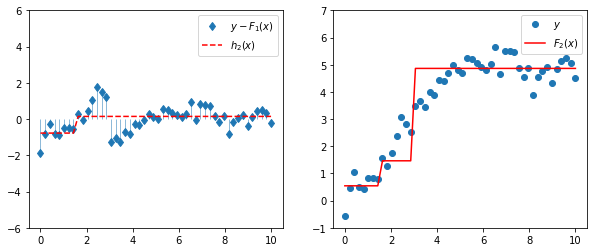

In [ ]:
#hide_input

# m = 2

fig, ax = plt.subplots(1,2, figsize=(10,4))

ax[0].plot(x, y - F_1, 'd', label=r'$y - F_1(x)$')
ax[0].vlines(x, 0, y - F_1, linewidth=0.5)
ax[0].plot(x, h_2.predict(x), '--r', label=r'$h_2(x)$')
ax[0].legend()
ax[0].set_ylim([-6, 6])

ax[1].plot(x, y, 'o', label=r'$y$')
ax[1].plot(x, F_2, '-r', label=r'$F_2(x)$')
ax[1].legend()
ax[1].set_ylim([-1,7]);

Podemos seguir haciendo esto hasta que

$$
F_M(x) = F_0(x) + \sum_{m = 1}^{M} h_m(x)
$$


Así se ve el modelo para $M=6$.

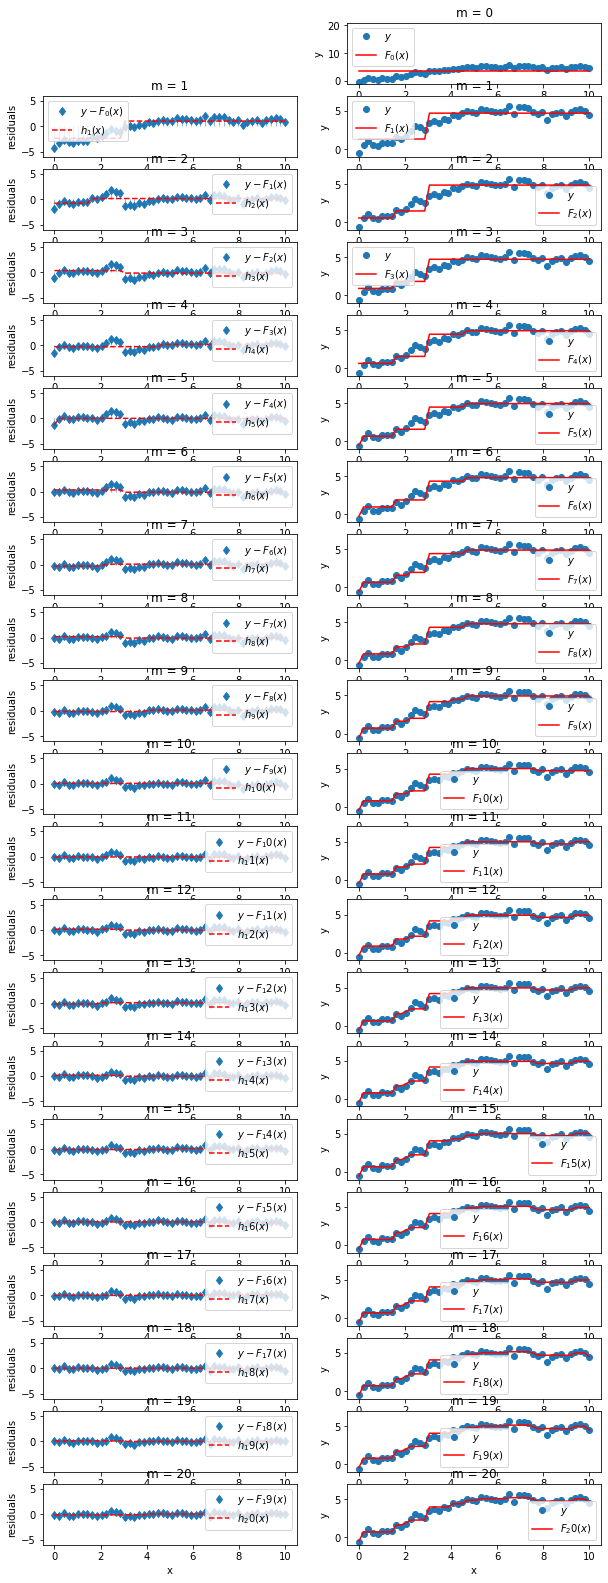

In [ ]:
#hide_input
# hyperparameters
learning_rate = 1
n_trees = 20
max_depth = 1

# Training
F0 = y.mean() 

fig, ax = plt.subplots(n_trees+1,2, figsize=(10,28))

ax[0,0].axis('off')
ax[0,1].plot(x, y, 'o', label=r'$y$')
ax[0,1].plot(x, F_0, '-r', label=r'$F_0(x)$')
ax[0,1].set_title('m = 0')
ax[0,1].set_ylabel('y')
ax[0,1].legend()
ax[0,1].set_ylim([-1,n_trees+1]);

Fm = F0
trees = []
for i in range(n_trees):
    tree = DecisionTreeRegressor(max_depth=max_depth)
    tree.fit(x, y - Fm)

    m = i + 1
    
    ax[m,0].plot(x, y - Fm, 'd', label=r'$y - F_{}(x)$'.format(m-1))
    ax[m,0].vlines(x, 0, y - Fm, linewidth=0.5)
    ax[m,0].plot(x, tree.predict(x), '--r', label=r'$h_{}(x)$'.format(m))
    ax[m,0].legend()
    ax[m,0].set_ylim([-6, 6])
    ax[m,0].set_title('m = {}'.format(m))
    ax[m,0].set_ylabel('residuals')

    Fm += learning_rate * tree.predict(x)
    trees.append(tree)
    
    ax[m,1].plot(x, y, 'o', label=r'$y$')
    ax[m,1].plot(x, Fm, '-r', label=r'$F_{}(x)$'.format(m))
    ax[m,1].legend()
    ax[m,1].set_ylim([-1,7])
    ax[m,1].set_title('m = {}'.format(m))
    ax[m,1].set_ylabel('y')

ax[m,0].set_xlabel('x')
ax[m,1].set_xlabel('x');

Voila! Boosting!

## Learning Rate
Hablemos del sobreajuste.
En la vida real, si solo agregamos nuestro nuevo alumno débil $h_m(x)$ directamente a nuestro modelo compuesto existente $F_{m-1}(x)$, es probable que terminemos sobreajustando nuestros datos de entrenamiento. Eso es porque si agregamos suficientes de estos estimadores débiles, van a perseguirlos tan de cerca que todos los residuos restantes son prácticamente cero, y habremos memorizado con éxito los datos de entrenamiento. Para evitar eso, los reduciremos un poco mediante un parámetro $\eta$ llamado tasa de aprendizaje.

Con la tasa de aprendizaje $\eta$, el paso de actualización se verá así

$$F_{m}(x) = F_{m-1}(x) + \eta h_m(x),$$

nuestro modelo compuesto se vería así

$$F_M(x) = F_0(x) + \eta \sum_{m = 1}^{M} h_m(x)$$

## Implementación

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# model hyperparameters
learning_rate = 0.3
n_trees = 10
max_depth = 1

# Training
F0 = y.mean() 
Fm = F0
trees = []
for _ in range(n_trees):
    tree = DecisionTreeRegressor(max_depth=max_depth)
    tree.fit(x, y - Fm)
    Fm += learning_rate * tree.predict(x)
    trees.append(tree)

# Prediction
y_hat = F0 + learning_rate * np.sum([t.predict(x) for t in trees], axis=0)

Defininimos parametros
- `learning_rate` is ($\eta$)
- `n_trees` número de árboles ($M$)
- `max_depth` profundidad de cada árbol - 1 en este caso 

Definimos las predicciones de nuestro modelo base `F0` para simplemente predecir el valor medio de `y`.
`Fm` corresponde al modelo compuesto actual $F_m(x)$ ya que iterativamente agregamos estimadores débiles, así que lo inicializaremos con `F0`.
`trees` es una lista vacía que usaremos para contener a nuestros alumnos débiles.

A continuación, agregamos iterativamente `n_trees` estimadores débiles a nuestro modelo compuesto.
En cada iteración, creamos un nuevo árbol de decisión y lo entrenamos en `x` para predecir los residuos actuales `y - Fm`.
Actualizamos `Fm` con las predicciones del estimador recién entrenado escaladas por la tasa de aprendizaje, y agregamos el nuevo estimador débil $h_m(x)$ en la lista de `árboles`.
Generamos predicciones finales `y_hat` en los datos de entrenamiento sumando las predicciones de cada estimador débil, escalando por la tasa de aprendizaje y agregando al modelo base (también conocido como la media de `y`).



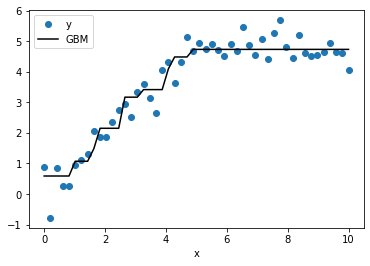

In [ ]:
#hide_input
plt.plot(x,y,'o', label='y')
plt.plot(x,y_hat,'-k', label='GBM')
plt.legend()
plt.xlabel('x');

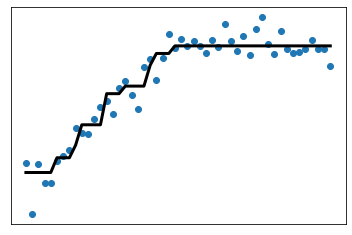

In [ ]:
#hide
fig , ax = plt.subplots()
plt.plot(x,y,'o', label='y')
plt.plot(x,y_hat,'-k', label='GBM', linewidth=3)
# plt.legend(loc=4, prop={'size': 15})
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.xlabel('x');

In [ ]:
class GradientBoostingFromScratch():
    
    def __init__(self, n_trees, learning_rate, max_depth=1):
        self.n_trees=n_trees; self.learning_rate=learning_rate; self.max_depth=max_depth;
        
    def fit(self, x, y):
        self.trees = []
        self.F0 = y.mean()
        Fm = self.F0 
        for _ in range(self.n_trees):
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(x, y - Fm)
            Fm += self.learning_rate * tree.predict(x)
            self.trees.append(tree)
            
    def predict(self, x):
        return self.F0 + self.learning_rate * np.sum([tree.predict(x) for tree in self.trees], axis=0)

Let's compare the performance of our implementation with the sklearn [`GradientBoostingRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html).

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

sklearn_gbm = GradientBoostingRegressor(n_estimators =25, learning_rate=0.3, max_depth=1)
sklearn_gbm.fit(x,y)

scratch_gbm = GradientBoostingFromScratch(n_trees=25, learning_rate=0.3, max_depth=1)
scratch_gbm.fit(x,y)

mean_squared_error(y, sklearn_gbm.predict(x)), mean_squared_error(y, scratch_gbm.predict(x))

(0.10772359033519116, 0.10772359033519115)

Heck yeah! Our homemade GBM is consistent with the sklearn implementation!